<a href="https://colab.research.google.com/github/Tobsam237/Project_capstone3/blob/main/05_Modelling_Capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Springboard Capstone Project Three: Modelling**

##**Predicting foetal state**  

In [66]:
#import necessary libaries and pre-processed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files

#files.upload()

In [67]:
df = pd.read_csv('df_final.csv', index_col = 0)
print(df.shape)
df.head(3)

(2126, 17)


,e,LBE,AC,FM,UC,MLTV,Width,DS,Tendency,A,C,D,E,AD,DE,SUSP,NSP
0,-1.446091,-1.352220,-0.764740,-0.195096,-1.285798,-1.028560,-0.165507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,-1.150615,-0.132526,0.358852,-0.195096,0.119475,0.393176,1.529124,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.992669,-0.030884,-0.202944,-0.195096,0.470793,0.926327,1.529124,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


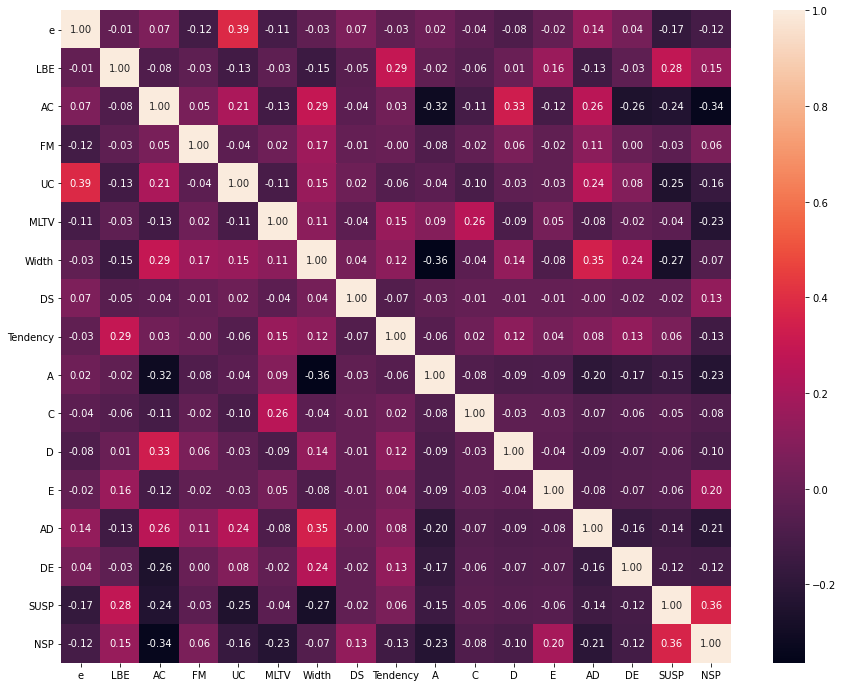

In [68]:
#Heatmap to confirm collinearity status between features
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot= True, fmt='.2f')

**Remarks:**
* Note absence of multi collinear features in the above heatmap
* Observe df is well scaled.

Therefore let's begin modelling. 

Being a multi-class classification problem, let's ensure the train and test sets have approximately the same percentage of samples of each target class


In [69]:
#let's split df to it's independent variables and target variable
X = df.drop(['NSP'], axis=1)
y= df.NSP

#Further split to train and test data. Stratify y to have approximately same percentage of target class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

##**Applying Machine Learning Models:**

**Logistic Regression**

In [70]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

logmod = LogisticRegression()
logmod.fit(X_train, y_train)
logmod_pred = logmod.predict(X_test)

#evaluate
print(confusion_matrix(y_test, logmod_pred))
print('Training Score is: ', logmod.score(X_train, y_train))
print('F1 score: ',f1_score(y_test, logmod_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(y_test, logmod_pred))
print('Recall is: ', recall_score(y_test, logmod_pred, average='weighted'))

[[496   0   1]
 [ 12  75   1]
 [  2   0  51]]
Training Score is:  0.9751344086021505
F1 score:  0.9742608422199287
Accuracy is:  0.9749216300940439
Recall is:  0.9749216300940439


**Decision Tree**

In [71]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dtmodel_pred = dt_model.predict(X_test)

#evaluate
print(confusion_matrix(y_test, dtmodel_pred))
print('Training score is:', dt_model.score(X_train, y_train))
print('F1 score: ',f1_score(y_test, dtmodel_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(y_test, dtmodel_pred))
print('Recall is: ', recall_score(y_test, dtmodel_pred, average='weighted'))

[[490   5   2]
 [ 11  77   0]
 [  0   0  53]]
Training score is: 1.0
F1 score:  0.9714298396890763
Accuracy is:  0.9717868338557993
Recall is:  0.9717868338557993


**Random Forest Classifier**

In [72]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rfmodel_pred = rf_model.predict(X_test)

#evaluate
print(confusion_matrix(y_test, rfmodel_pred))
print('Training score is:', rf_model.score(X_train, y_train))
print('F1 score: ',f1_score(y_test, rfmodel_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(y_test, rfmodel_pred))
print('Recall is: ', recall_score(y_test, rfmodel_pred, average='weighted'))

[[493   2   2]
 [ 11  77   0]
 [  0   0  53]]
Training score is: 1.0
F1 score:  0.9760512016767531
Accuracy is:  0.9764890282131662
Recall is:  0.9764890282131662


**Gradient Boosting Classifier**

In [73]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate= 0.2)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

#evaluate
print(confusion_matrix(y_test, xgb_pred))
print('Training score is:', xgb_model.score(X_train, y_train))
print('F1 score: ',f1_score(y_test, xgb_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(y_test, xgb_pred))
print('Recall is: ', recall_score(y_test, xgb_pred, average='weighted'))

[[493   3   1]
 [ 11  77   0]
 [  0   0  53]]
Training score is: 0.9986559139784946
F1 score:  0.9760560926587939
Accuracy is:  0.9764890282131662
Recall is:  0.9764890282131662


In [74]:
X_train.shape

(1488, 16)

**Remarks:**

* Observe XGBoost Classifier peformed best among all attempted supervised learning models by all evaluation metrics
* Observe that the tree models seems to overfit
* Logistic Regression seems okay but lags slightly behind Gradient Boosting


##**Neural Networks**

In attempt for a better performing model, let's attempt deep learning technique if we would get a even better result based on our metrics using keras Tensorflow


In [75]:
#import necessary packages 

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical


To train the Nueral Network, single target variable must be converted into one hot encoded format. We could use scikit learn  LabelEncoder

In [76]:
#Convert target y to a one hot encoded y for Neural Network
encoder = LabelEncoder()
y=df.NSP
y = encoder.fit_transform(y)
y = to_categorical(y)


In [77]:
#Resplit data update y_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

**Let's define our Neural Network Model**

* We use multiple layers using activators: rectified linear unit(relu) and sigmoid. 
* Since it's a multi-class classification problem, we use softmax and 3 neurons for output layers
* Our input dimension is 16 since we input variable colunmns is 16
* We randomly chose to increase number of nuerons by 20 per layer

In [78]:
#Define baseline model

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=16))
#randomly turn nuerons on and off to improve convergence
#model.add(Dropout(0.25))
model.add(Dense(40, activation='sigmoid'))
#one more dropout
#model.add(Dropout(0.25))
model.add(Dense(60, activation='relu'))
#final dropout
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
#Fit data to Nueral Network model
train = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.7625
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7971
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7567
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8190
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8548
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8925
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9171
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9239
Epoch 9/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9087
Epoch 10/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9371
Epoch 11/50
47/47 [

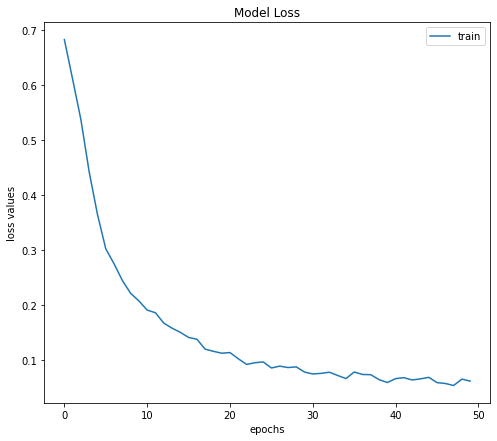

In [85]:
# plot loss during training
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
plt.plot(train.history['loss'], label='train')
#plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

In [35]:
#Evaluate model performance
print(model.evaluate(X_test.values, y_test))

#Make predictions
y_pred = model.predict_classes(X_test)


20/20 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9843
[0.09808441996574402, 0.9843260049819946]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
#Evaluate neural network model predictions
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print('F1 score: ',f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(np.argmax(y_test, axis=1), y_pred, ))
print('Recall is: ', recall_score(y_pred, np.argmax(y_test, axis=1), average='weighted'))


[[492   3   2]
 [  3  84   1]
 [  1   0  52]]
F1 score:  0.9843456196159603
Accuracy is:  0.9843260188087775
Recall is:  0.9843260188087775


Observe our Nueral Network model performs  better than our best supervised machine learning models


##**Grid Seearch Cross validation Deep Learning Model Parameter**
Thus lets attempt to optimise our Neural network using Gridsearch cross validation


[*This takes about 20mins of machine time on CPU, use TPU to reduce machine time*]

In [37]:
#import necessay packages
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

#Let's create a baseline model, required by KerasClassifier for training

def create_model(optimizer= 'adam'):
  model = Sequential()
  model.add(Dense(20,activation='relu', input_dim=16))
  #model.add(Dropout(0.25))
  model.add(Dense(40, activation='sigmoid'))
  #model.add(Dropout(0.25))
  model.add(Dense(60, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#create model
model_cv = KerasClassifier(build_fn = create_model, verbose=0)

#set paramaters grid for gridsearch cross validation
param_grid = {
    'epochs' : [50,100,150],
    'batch_size': [5,10,20],
    'optimizer': ['adam', 'SGD', 'RMSprop' ]
    }
grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, cv=3)

#fit data to model
grid_result = grid.fit(X_train, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.980511 using {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}


**Make predictions and evaluate**
<br/>With the model trained using crossvalidation with 3 folds, we can use it to make predictions.

Let's predict the unseen validation data

In [41]:
#predict 
y_cv_pred = grid.predict(X_test)

#Evaluate neural network model predictions
print(confusion_matrix(np.argmax(y_test, axis=1), y_cv_pred))
print('F1 score: ',f1_score(np.argmax(y_test, axis=1), y_cv_pred, average='weighted'))
print('Accuracy is: ', accuracy_score(np.argmax(y_test, axis=1), y_cv_pred, ))
print('Recall is: ', recall_score(y_cv_pred, np.argmax(y_test, axis=1), average='weighted'))


[[495   1   1]
 [  3  85   0]
 [  3   0  50]]
F1 score:  0.9873896269904696
Accuracy is:  0.987460815047022
Recall is:  0.987460815047022


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This our best result yet of all attempted methods by all evaluation metrics

#**Receiver Operating Characteristic (ROC Curve)**

Let's further evalaute quality of our classifier output by plotting the true positive rate on y-axis and false positive rate on x-axis. 

The “steepness” of ROC curves is important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [53]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

#number of classes
n_classes=3
y_score = grid_result.predict_proba(X_test)

#Compute ROC Curve and ROC area for each class
fpr= dict()
tpr = dict()
roc_auc= dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])

#compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _= roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


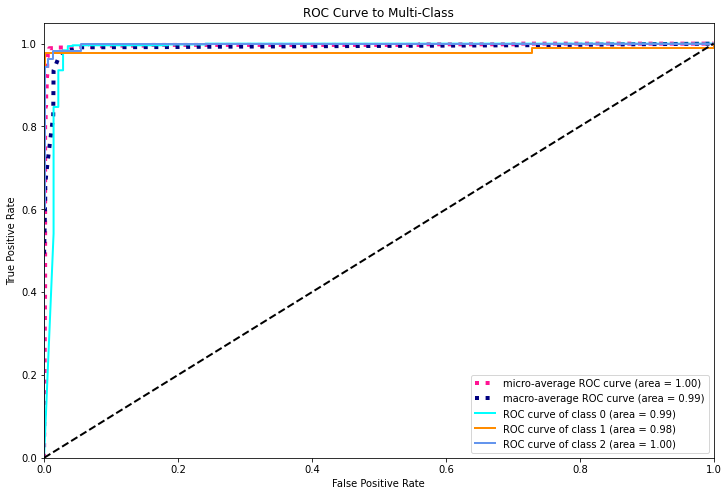

In [65]:
from itertools import cycle
from scipy import interp
lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()


Observe from the ROC Curve
* All classes maximized True positives rate
* All classes minimized the false positive rate

Thus, the quality of model seems top notch

##**Conclusion**

In this classification problem, we have attempted to predict the fetal state given cardiotocography data:
* We attempted multiple machine learning models; DecisionTree, RandomForest, Logistic REgression and XGBoost techniques. 
* The best performing out of all attempted machine learning models was XGBoost with scores:**F1 score:  0.9760560926587939
Accuracy is:  0.9764890282131662
Recall is:  0.9764890282131662**
* We attemted deep learning which performed better than XGBoost
* To optimise, we built a gridsearcv neural network model which performed best overall with score: **F1 score:  0.9873896269904696
Accuracy is:  0.987460815047022
Recall is:  0.987460815047022**
